In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("16325569497737558.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [4]:
df=df[['age', 'sex','cp','chol','fbs','thall','output']]
df['output']=df['output'].astype('int')
df.head()

,age,sex,cp,chol,fbs,thall,output
0,63,1,3,233,1,1,1
1,37,1,2,250,0,2,1
2,41,0,1,204,0,2,1
3,56,1,1,236,0,2,1
4,57,0,0,354,0,2,1


In [5]:
x=np.asanyarray(df[['age', 'sex','cp','chol','fbs','thall']])
x[0:5]

array([[ 63,   1,   3, 233,   1,   1],
       [ 37,   1,   2, 250,   0,   2],
       [ 41,   0,   1, 204,   0,   2],
       [ 56,   1,   1, 236,   0,   2],
       [ 57,   0,   0, 354,   0,   2]])

In [20]:
y=np.asanyarray(df['output'])
y [0:5]

array([1, 1, 1, 1, 1])

In [21]:
from sklearn import preprocessing
ps_sd=preprocessing.StandardScaler()
x=ps_sd.fit(x).transform(x)
x[0:5]

array([[ 0.95,  0.68,  1.97, -0.26,  2.39, -2.15],
       [-1.92,  0.68,  1.  ,  0.07, -0.42, -0.51],
       [-1.47, -1.47,  0.03, -0.82, -0.42, -0.51],
       [ 0.18,  0.68,  0.03, -0.2 , -0.42, -0.51],
       [ 0.29, -1.47, -0.94,  2.08, -0.42, -0.51]])

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split( x, y, test_size=0.2, random_state=4)
print("Train set: ",x_train.shape, y_train.shape)
print("Test set: ",x_test.shape, y_test.shape)

Train set:  (242, 6) (242,)
Test set:  (61, 6) (61,)


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR=LogisticRegression(C=0.01, solver='liblinear',).fit(x_train,y_train)
print(LR)

LogisticRegression(C=0.01, solver='liblinear')


In [26]:
yhat=LR.predict(x_test)
print(yhat)
print(y_test)

[0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1
 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1]
[1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1
 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1]


In [27]:
yhat_prob=LR.predict_proba(x_test)
yhat_prob[0:5]

array([[0.59, 0.41],
       [0.57, 0.43],
       [0.52, 0.48],
       [0.27, 0.73],
       [0.41, 0.59]])

In [28]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat, pos_label=0)

0.6774193548387096

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[30  6]
 [ 4 21]]


Confusion matrix, without normalization
[[30  6]
 [ 4 21]]


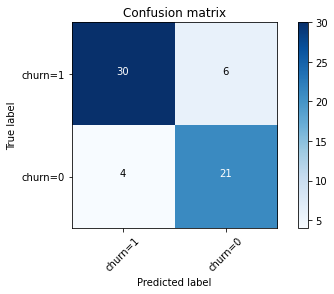

In [36]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [37]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        25
           1       0.88      0.83      0.86        36

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.84      0.84      0.84        61



In [39]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5519313562039284

In [38]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.8368762385155828